## Intro

In [34]:
#0. end to end sckit learn work flow 
#1. get data ready 
#2. choose right model and hyper parameters 
#3. Fit the model to the data 
#4 evaluate model
#5 improve model
import sklearn
sklearn.show_versions()


System:
    python: 3.9.7 (default, Sep 16 2021, 08:50:36)  [Clang 10.0.0 ]
executable: /Users/sunnykotwal/Documents/sample_project/env/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
          pip: 21.2.4
   setuptools: 58.0.4
      sklearn: 1.0.2
        numpy: 1.21.2
        scipy: 1.7.3
       Cython: None
       pandas: 1.4.1
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


## 0. end to end sckit learn work flow 

## 1. get data ready 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
#create X (feature matrix)
X = heart_disease.drop("target",axis=1)
y = heart_disease ["target"]

In [14]:
#2. choose right model and hyper parameters 
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
#3. Fit the model to the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [18]:
clf.fit(X_train,y_train);

In [21]:
#y_label = clf.predict(np.array([0,2,3,4]))

In [22]:
y_preds= clf.predict(X_test)
y_preds

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [23]:
y_test

113    1
224    0
203    0
259    0
297    0
      ..
107    1
251    0
289    0
75     1
153    1
Name: target, Length: 61, dtype: int64

In [25]:
#4 evaluate model
clf.score(X_train,y_train)

1.0

In [27]:
clf.score(X_test,y_test)

0.8524590163934426

In [28]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [30]:
confusion_matrix(y_test,y_preds)

array([[22,  6],
       [ 3, 30]])

In [31]:
classification_report(y_test,y_preds)
#without print it works but not really

'              precision    recall  f1-score   support\n\n           0       0.88      0.79      0.83        28\n           1       0.83      0.91      0.87        33\n\n    accuracy                           0.85        61\n   macro avg       0.86      0.85      0.85        61\nweighted avg       0.85      0.85      0.85        61\n'

In [32]:
accuracy_score(y_test,y_preds)

0.8524590163934426

In [38]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
# setting up x and y variables 
#dropping target to make it y only
X = heart_disease.drop("target",axis= 1)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [42]:
y= heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [45]:
#split to training and test sets 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [46]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [48]:
car_sales_extended = pd.read_csv("car-sales-extended.csv")
car_sales_extended

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [49]:
X = car_sales_extended.drop("Price",axis=1)
y= car_sales_extended["Price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [50]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.39897551487414196

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                                   remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [57]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [58]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size = 0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [59]:
model.score(X_test,y_test)

0.3235867221569877

In [64]:
car_sales_extended = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_extended


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [65]:
car_sales_extended.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [66]:
X = car_sales_extended.drop("Price",axis=1)
y= car_sales_extended["Price"]

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                                   remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [69]:
car_sales_extended["Make"].fillna("missing",inplace=True)
car_sales_extended["Colour"].fillna("missing",inplace=True)
car_sales_extended["Odometer (KM)"].fillna(car_sales_extended["Odometer (KM)"].mean(),inplace=True)
car_sales_extended["Doors"].fillna(4,inplace=True)

In [71]:
car_sales_extended.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [72]:
car_sales_extended.dropna(inplace=True)

In [73]:
car_sales_extended.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [74]:
X = car_sales_extended.drop("Price",axis=1)
y= car_sales_extended["Price"]

In [76]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                                   remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_extended)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [77]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [78]:
car_sales_missing.dropna(subset=["Price"],inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [79]:
X= car_sales_missing.drop("Price",axis = 1)
y= car_sales_missing["Price"]

In [81]:
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer

cat_imputer= SimpleImputer(strategy="constant",fill_value = "missing")
door_imputer = SimpleImputer(strategy="constant",fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

cat_features = ["Colour","Make"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

imputer = ColumnTransformer([
          ("cat_imputer",cat_imputer,cat_features),
          ("door_imputer",door_imputer, door_feature),
          ("num_imputer",num_imputer,num_feature)])
filled_X = imputer.fit_transform(X)
filled_X


array([['White', 'Honda', 4.0, 35431.0],
       ['Blue', 'BMW', 5.0, 192714.0],
       ['White', 'Honda', 4.0, 84714.0],
       ...,
       ['Blue', 'Nissan', 4.0, 66604.0],
       ['White', 'Honda', 4.0, 215883.0],
       ['Blue', 'Toyota', 4.0, 248360.0]], dtype=object)

In [83]:
car_sales_filled = pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,White,Honda,4.0,35431.0
1,Blue,BMW,5.0,192714.0
2,White,Honda,4.0,84714.0
3,White,Toyota,4.0,154365.0
4,Blue,Nissan,3.0,181577.0


In [84]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                                   remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [87]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22456284151211192

In [88]:
from sklearn.datasets import fetch_california_housing 
housing= fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [90]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [92]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [94]:
housing_df = housing_df.drop("MedHouseVal",axis=1)


KeyError: "['MedHouseVal'] not found in axis"

In [95]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [96]:
from sklearn.linear_model import Ridge
np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = Ridge()
model.fit(X_train,y_train)
model.score(X_test,y_test)



0.5758549611440126

In [99]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)




0.8066196804802649

In [100]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [102]:
len(heart_disease)

303

In [103]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X= heart_disease.drop("target",axis=1)
y= heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = LinearSVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

/Users/sunnykotwal/Documents/sample_project/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [104]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target",axis=1)
y= heart_disease["target"]

#for classifier might want to use clf instead of model for variable
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8524590163934426

In [105]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target",axis=1)
y= heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8524590163934426

In [107]:
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [108]:
model.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [111]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [110]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [113]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [114]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X= housing_df.drop(["target"], axis=1)
y= housing_df["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 )
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [115]:
y_pred[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [118]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [119]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,y_test)

0.3265721842781009

In [120]:
mean_absolute_error(y_test,y_pred)

0.3265721842781009

In [121]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [123]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y= heart_disease["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8524590163934426

In [124]:
 from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y= heart_disease["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5106393318965518

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y= heart_disease["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8524590163934426

In [126]:
cross_val_score(model,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [127]:
np.mean(cross_val_score(model,X,y))

0.8183606557377049

In [128]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y= heart_disease["target"]
model = RandomForestClassifier()
cross_val_score(model,X,y)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

In [133]:
#area under the receiving operating characteristic curve AUC/ROC

#True positives vs false positive 

from sklearn.metrics import roc_curve 
model.fit(X_train,y_train)
y_probs = model.predict_proba(X_test)
y_probs[:10]

array([[0.58, 0.42],
       [0.09, 0.91],
       [0.55, 0.45],
       [0.75, 0.25],
       [0.52, 0.48],
       [0.09, 0.91],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.14, 0.86],
       [0.39, 0.61]])

In [138]:
#y_probs = y_probs[:,1] slicing to show only 2nd row 
y_probs

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61, 0.84,
       0.77, 0.97, 0.5 , 0.85, 0.08, 0.77, 0.49, 0.05, 0.05, 0.94, 0.85,
       1.  , 0.76, 0.15, 0.28, 0.86, 0.12, 0.68, 0.41, 0.19, 0.14, 0.22,
       0.49, 0.91, 0.96, 0.78, 0.88, 0.2 , 0.97, 0.35, 0.78, 0.88, 0.24,
       0.02, 0.43, 0.03, 0.9 , 0.75, 0.36, 0.42, 0.2 , 0.9 , 0.31, 0.47,
       0.97, 0.67, 0.06, 0.94, 0.06, 0.07])

In [139]:
fpr,tpr,thresholds = roc_curve(y_test,y_probs)

In [140]:
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

In [141]:
tpr


array([0.     , 0.03125, 0.09375, 0.125  , 0.1875 , 0.28125, 0.34375,
       0.375  , 0.4375 , 0.46875, 0.5    , 0.5625 , 0.59375, 0.65625,
       0.65625, 0.75   , 0.75   , 0.78125, 0.8125 , 0.8125 , 0.84375,
       0.84375, 0.875  , 0.9375 , 0.9375 , 0.96875, 0.96875, 0.96875,
       1.     , 1.     , 1.     , 1.     , 1.     ])

In [142]:
thresholds

array([2.  , 1.  , 0.97, 0.96, 0.94, 0.91, 0.9 , 0.88, 0.86, 0.85, 0.84,
       0.78, 0.77, 0.75, 0.7 , 0.61, 0.5 , 0.49, 0.48, 0.47, 0.45, 0.43,
       0.42, 0.36, 0.28, 0.25, 0.22, 0.2 , 0.19, 0.07, 0.05, 0.03, 0.02])

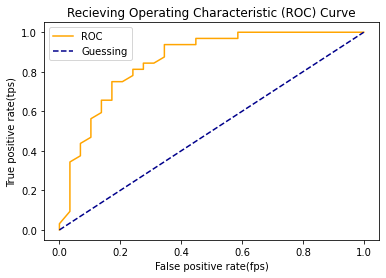

In [145]:
import matplotlib.pyplot as plt 

def plot_roc_curve(tpr,fpr):
    plt.plot(fpr,tpr,color = "orange",label="ROC")
    plt.plot([0,1],[0,1],color = "darkblue",linestyle = "--",label = "Guessing")
    
    plt.xlabel("False positive rate(fps)")
    plt.ylabel("True positive rate(tps)")
    plt.title("Recieving Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(tpr,fpr)

In [147]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs)

0.8561422413793104

In [149]:
from sklearn.metrics import confusion_matrix
y_preds = model.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 8, 24]])

In [151]:
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,8,24


In [153]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/sunnykotwal/Documents/sample_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.3.29  |       hecd8cb5_1         122 KB
    openssl-1.1.1n             |       hca72f7f_0         2.2 MB
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.2-pyhd3eb1b0_0

The following packages will be UPDATED:

  ca-certificates                       2022.2.1-hecd8cb5_0 --> 2022.3.29-hecd8cb5_1
  openssl 

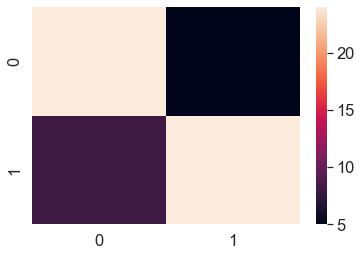

In [154]:
import seaborn as sns 
sns.set (font_scale=1.5)
con_mat = confusion_matrix(y_test,y_preds)
sns.heatmap(con_mat);

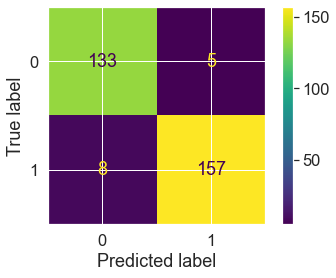

In [157]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator = model,X=X,y=y)

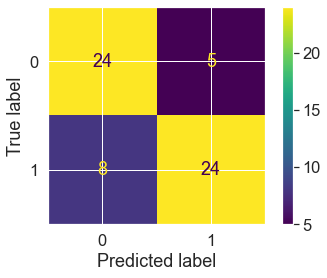

In [158]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,y_pred=y_preds)

In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [161]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8066196804802649

In [162]:
from sklearn.metrics import r2_score
y_test_mean =np.full(len(y_test),y_test.mean())

In [163]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [166]:
from sklearn.metrics import mean_absolute_error
y_preds= model.predict(X_test)
mea = mean_absolute_error(y_test,y_preds)
mea
# each value is on average +/- different from the mae

0.3265721842781009

In [170]:
df = pd.DataFrame(data={"actual val":y_test,"predicted val":y_pred})
df["differences"]= df["predicted val"] - df["actual val"]
df.head()

,actual val,predicted val,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240


In [171]:
np.abs(df["differences"]).mean()

0.32657218427810186

In [174]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X= heart_disease.drop("target",axis = 1)
y= heart_disease["target"]

clf = RandomForestClassifier()


In [175]:
np.random.seed(42)
cv_acc =cross_val_score(clf,X,y,cv=5,scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [177]:
np.mean(cv_acc) 

0.8248087431693989

In [178]:
np.random.seed(42)
cv_acc =cross_val_score(clf,X,y,cv=5,scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [179]:
np.mean(cv_acc)

0.8248087431693989

In [181]:
np.random.seed(42)
cv_pre =cross_val_score(clf,X,y,cv=5,scoring = "precision")
cv_pre

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [182]:
np.mean(cv_pre)

0.8329547346025924

In [183]:
np.random.seed(42)
cv_recall =cross_val_score(clf,X,y,cv=5,scoring = "recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [184]:
np.mean(cv_recall)

0.8545454545454545

In [208]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X= heart_disease.drop("target",axis = 1)
y= heart_disease["target"]

model = RandomForestRegressor()

In [209]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3)
np.mean(cv_r2)


0.11597576013513518

In [202]:
cv_r2

array([0.        , 0.        , 0.32184393, 0.        , 0.        ])

In [215]:
from sklearn.metrics  import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
X= heart_disease.drop("target",axis = 1)
y= heart_disease["target"]
clf = RandomForestClassifier()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2)
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_preds)}")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")

Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [217]:
from sklearn.metrics  import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
X= heart_disease.drop("target",axis = 1)
y= heart_disease["target"]
clf = RandomForestRegressor()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2)
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)
print(f"R2: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

R2: 0.5106393318965518
MAE: 0.23754098360655734
MSE: 0.12204426229508197


In [218]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [229]:
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1= f1_score(y_true,y_preds)
    metric_dict = {"accuracy":round(accuracy,2),
                    "precision":round(precision,2),
                      "recall":round(recall,2),
                     "fl":round(f1,2)}
    print(f"accuracy:{accuracy*100:.2f}%")
    print(f"precision:{precision*100:.2f}")
    print(f"recall:{recall*100:.2f}")
    print(f"f1:{f1*100:.2f}")
    return metric_dict 

In [230]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
#basically shuffles data
heart_disease_shuffled = heart_disease.sample(frac=1)
X = heart_disease_shuffled.drop("target",axis=1)
y= heart_disease_shuffled["target"]
train_split = round(.7* len(heart_disease_shuffled))
valid_split = round(train_split + .15* len(heart_disease_shuffled))
X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_train,y_train = X[valid_split:],y[valid_split:]
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
#predict on validation set
y_preds = clf.predict(X_valid)
#eval on val set 
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

accuracy:88.89%
precision:88.46
recall:92.00
f1:90.20


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.92, 'fl': 0.9}

In [231]:
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=150)
clf_2.fit(X_train,y_train)
y_preds_2 = clf_2.predict(X_valid)
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)
clf_2_metrics

accuracy:86.67%
precision:85.19
recall:92.00
f1:88.46


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.92, 'fl': 0.88}

In [233]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators":[10,100,200,500,1000,1200],
           "max_depth":[None,5,10,20,30],
           "max_features":["auto","sqrt"],
            "min_samples_split":[2,4,6],
           "min_samples_leaf":[1,2,4]}
np.random.seed(42)
X = heart_disease_shuffled.drop("target",axis=1)
y= heart_disease_shuffled["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
clf = RandomForestClassifier(n_jobs=1)
rs_clf = RandomizedSearchCV(estimator = clf,param_distributions=grid,
                               n_iter=10,cv=5,verbose = 2)
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [234]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [235]:
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test,rs_y_preds)

accuracy:81.97%
precision:77.42
recall:85.71
f1:81.36


In [236]:
#grid search will go through every single posibility of hyper-para combo you give 
grid


{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [237]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [238]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)
X = heart_disease_shuffled.drop("target",axis=1)
y= heart_disease_shuffled["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
clf = RandomForestClassifier(n_jobs=1)
gs_clf = GridSearchCV(estimator = clf,param_grid=grid_2,
                               cv=5,verbose = 2)
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [239]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [240]:
gs_y_preds = gs_clf.predict(X_test)
gs_metrics = evaluate_preds(y_test,gs_y_preds)
gs_metrics

accuracy:78.69%
precision:74.19
recall:82.14
f1:77.97


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'fl': 0.78}

<AxesSubplot:>

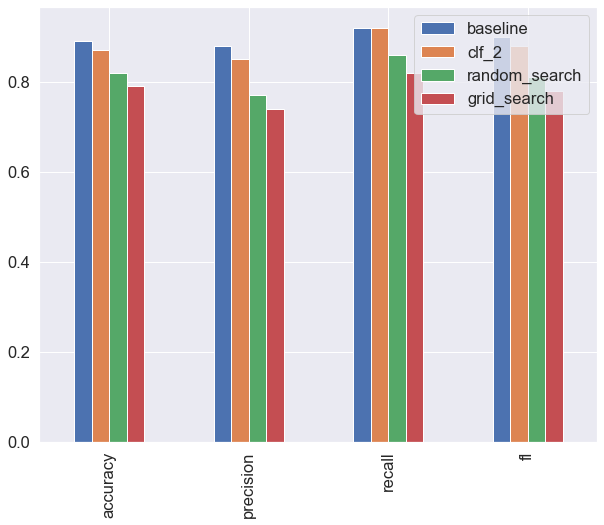

In [245]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,"clf_2":clf_2_metrics,"random_search":rs_metrics,
                                "grid_search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

In [247]:
import pickle
pickle.dump(gs_clf, open("gs_random_forrest_model_1.pkl","wb"))

In [250]:
loaded_pickle_model = pickle.load(open("gs_random_forrest_model_1.pkl","rb"))


In [251]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

accuracy:78.69%
precision:74.19
recall:82.14
f1:77.97


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'fl': 0.78}

In [252]:
from joblib import dump, load

dump(gs_clf, filename="gs_random_forrest_model_1.joblib")

['gs_random_forrest_model_1.joblib']

In [253]:
load_job_model = load(filename="gs_random_forrest_model_1.joblib")

In [255]:
data = pd.read_csv("car-sales-extended-missing-data.csv") 
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [256]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [258]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [267]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

np.random.seed(42)
data = pd.read_csv("car-sales-extended-missing-data.csv") 
data.dropna(subset=["Price"],inplace = True)

categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="constant",fill_value="missing")),
         ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transform = Pipeline(steps=[
        ("imputer",SimpleImputer(strategy="constant",fill_value=4))])
numeric_feature = ["Odometer (KM)"]
numeric_transform = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))])

preprocessor = ColumnTransformer(
                transformers=[
                    ("cat",categorical_transformer,categorical_features),
                    ("door",door_transform,door_feature),
                    ("num",numeric_transform,numeric_feature)])
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model",RandomForestRegressor())])
X= data.drop("Price",axis=1)
y = data["Price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

In [269]:
pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]
}
gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)
#gs_model.score

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [271]:
gs_model.score(X_test,y_test)

0.3339554263158365